# Title: LA Crimes Part 1/2
# Analysis by: Christian Little
# Date: 09/20/2024
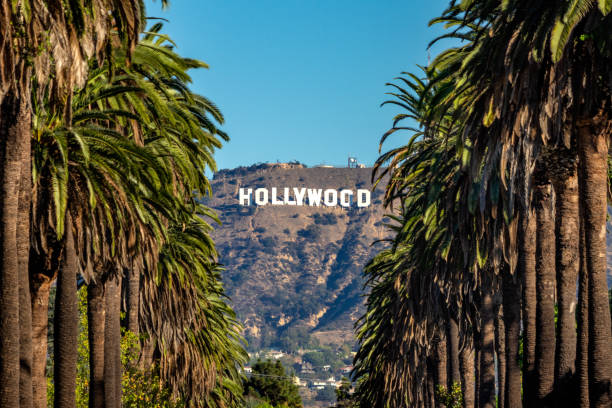

## Introduction:

This report presents a comprehensive analysis of crime data spanning from 2020 to 2023, extracted from the recently compiled LA metropolitan public safety records. In the face of evolving societal norms and regulatory practices, this analysis aims to identify significant trends, patterns, and anomalies within the crime statistics. Specifically, the report focuses on the annual variation in crime rates, the distribution of different types of crimes, and their occurrences across various districts. By examining these aspects, the study seeks to provide insights into the effectiveness of current law enforcement strategies and propose data-driven recommendations for future policing policies. The overarching goal is to foster a safer community by enhancing our understanding of crime dynamics, which can guide policymakers and law enforcement agencies in effectively allocating resources and formulating targeted interventions.

# ASK:

### 1. Identify the task 

The primary task is to conduct a detailed analysis of the crimes dataset to uncover underlying patterns and trends in criminal activities over the specified period. The investigation will focus on discerning crime variances, geographical hotspots, and evolution in the types of crimes committed.

### 2. Questions for the analysis  

+ What are the leading crimes in Los Angeles?
+ Where do these crimes typically occur?
+ Are there trends in the types of crimes occurring in specific locations?
+ Over the years, has there been a decline in the number of crimes committed, indicating an increase in peace and safety?

### Key task:

To develop a deep and nuanced understanding of the patterns of crime in Los Angeles, allowing both myself and readers to thoughtfully consider the possible underlying reasons.








# Prepare:

This dataset, available from https://www.kaggle.com/, contains comprehensive crime data spanning from 2020 to the present. https://www.kaggle.com/datasets/qnqfbqfqo/crime-data-from-2020-to-present is Composed of one CSV file, the dataset includes 815,882 rows of detailed crime reports. These reports encompass a variety of crime types, incident locations, and associated information distributed across several police precincts. To facilitate deeper analysis and enhance the accessibility of the data, it was meticulously cleaned and organized in Microsoft Excel. This preparation enables a thorough examination of crime trends, patterns, and frequencies, with the ultimate goal of informing public safety strategies and law enforcement efforts."

# Importing

In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
 
from tabulate import tabulate



In [77]:
# Load the first CSV file
df = pd.read_csv(r"C:\Users\bliss\OneDrive\Documents\Analysis projects\Crime_Data_from_2020_to_Present (1).csv")



## Initial cleaning process

In [78]:
# Display the data types of each column in the DataFrame 'df'
df.dtypes


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [79]:
# Creating a dictionary to change old column names to more descriptive new ones. This adjustment is necessary to enhance readability and understanding of the dataset.

rename_dict = {
    'Date Rptd': 'Date_reported',
    'DATE OCC': 'Date_occured',
    'Crm Cd Desc': 'Crime_description',
    'Vict Age': 'Victim_age',
    'AREA NAME': 'Area_name',
    'Vict Sex' : 'Vict_sex',
    'Premis Desc' : 'Premis_description',
    'Weapon Desc' : 'Weapon_description',
    
    
}

# Rename the columns
df = df.rename(columns=rename_dict)

# Verify the changes
print(df.columns)



Index(['DR_NO', 'Date_reported', 'Date_occured', 'TIME OCC', 'AREA',
       'Area_name', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crime_description',
       'Mocodes', 'Victim_age', 'Vict_sex', 'Vict Descent', 'Premis Cd',
       'Premis_description', 'Weapon Used Cd', 'Weapon_description', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


In [80]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'], format='%m/%d/%Y %I:%M:%S %p')
df['Date_occured'] = pd.to_datetime(df['Date_occured'], format='%m/%d/%Y %I:%M:%S %p')


In [81]:
# Drop rows with any missing values from the DataFrame and create a new DataFrame 'cleaned_df'
cleaned_df = df.dropna()

# Check and display the number of missing values in each column of the cleaned DataFrame
cleaned_df.isna().sum()


DR_NO                 0
Date_reported         0
Date_occured          0
TIME OCC              0
AREA                  0
Area_name             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crime_description     0
Mocodes               0
Victim_age            0
Vict_sex              0
Vict Descent          0
Premis Cd             0
Premis_description    0
Weapon Used Cd        0
Weapon_description    0
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2              0
Crm Cd 3              0
Crm Cd 4              0
LOCATION              0
Cross Street          0
LAT                   0
LON                   0
dtype: int64

In [82]:
# After reviewing the dataset, I have identified several columns that are not relevant to the analysis.

df.columns

Index(['DR_NO', 'Date_reported', 'Date_occured', 'TIME OCC', 'AREA',
       'Area_name', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crime_description',
       'Mocodes', 'Victim_age', 'Vict_sex', 'Vict Descent', 'Premis Cd',
       'Premis_description', 'Weapon Used Cd', 'Weapon_description', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')

In [83]:
# Columns to be deleted
columns_to_delete = ['TIME OCC', 'AREA', 'Part 1-2', 'Premis Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']

# Delete the specified columns
df.drop(columns=columns_to_delete, inplace=True)




In [84]:
# Remove all duplicate rows in the DataFrame and store the result back in 'df'.
# This step ensures that each row in the DataFrame is unique based on all columns.
df = df.drop_duplicates()

# After removing duplicates, this line checks for any remaining duplicate rows in the DataFrame.
# It returns a Series of boolean values where 'True' indicates a duplicate row and 'False' indicates a unique row.
# The purpose is to verify that all duplicates have been successfully removed.
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
815877    False
815878    False
815879    False
815880    False
815881    False
Length: 815882, dtype: bool

In [85]:
# Define a dictionary to map shorthand sex identifiers to their full descriptions.
# This helps in converting coded data into more understandable and readable form.
sex_mapping = {
    'H': 'Hermaphrodite',  # 'H' stands for Hermaphrodite
    'X': 'Non-binary',     # 'X' stands for Non-binary
    'F': 'Female',         # 'F' stands for Female
    'M': 'Male'            # 'M' stands for Male
}

# Apply the mapping to the 'Vict_sex' column in the DataFrame.
# This converts all shorthand codes in 'Vict_sex' to their corresponding full descriptions
# using the sex_mapping dictionary defined above.
df['Vict_sex'] = df['Vict_sex'].map(sex_mapping)

# After mapping, verify the changes by printing the unique values in the 'Vict_sex' column.
# This step is crucial to ensure that the mapping was applied correctly and to check for any unexpected results.
# It will display all unique entries that now exist in the 'Vict_age' column after mapping,
# helping identify if any codes were not correctly mapped or if other unique values need attention.
print(df['Vict_sex'].unique())


['Female' 'Male' 'Non-binary' nan 'Hermaphrodite']


# Analyzing 

In [86]:
# Display the first few rows of the DataFrame 'df' to provide a quick snapshot of the data.
# By default, df.head() shows the first 5 rows, which helps in quickly verifying the structure of the DataFrame,
# including data types, column names, and the overall content of the dataset.
df.head()


,DR_NO,Date_reported,Date_occured,Area_name,Rpt Dist No,Crm Cd,Crime_description,Mocodes,Victim_age,Vict_sex,Vict Descent,Premis_description,Weapon Used Cd,Weapon_description,Status,Status Desc,LOCATION,Cross Street
0,10304468,2020-01-08,2020-01-08,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,Female,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,NaN
1,190101086,2020-01-02,2020-01-01,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,Male,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,NaN
2,200110444,2020-04-14,2020-02-13,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,Non-binary,X,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,NaN
3,191501505,2020-01-01,2020-01-01,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,Female,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,NaN
4,191921269,2020-01-01,2020-01-01,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,Non-binary,X,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,NaN


In [87]:
total_crimes = len(df)

# Print the total number of crimes
print(f"The total amount of LA crimes recorded in the dataset is: {total_crimes}")

The total amount of LA crimes recorded in the dataset is: 815882


In [88]:
# Extract the year from 'Date_occured'
df['Year'] = df['Date_occured'].dt.year

# Group by the year and 'Crime_description', count the occurrences
crime_summary = df.groupby(['Year', 'Crime_description']).size().reset_index(name='Count')
# Sort the results in ascending order by year
crime_summary_sorted = crime_summary.sort_values(by='Year', ascending=True)
display(crime_summary_sorted)





,Year,Crime_description,Count
0,2020,ARSON,665
94,2020,SEXUAL PENETRATION W/FOREIGN OBJECT,327
93,2020,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",291
92,2020,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,304
91,2020,ROBBERY,6896
...,...,...,...
430,2023,CRIMINAL HOMICIDE,247
429,2023,"CREDIT CARDS, FRAUD USE ($950.01 & OVER)",13
428,2023,"CREDIT CARDS, FRAUD USE ($950 & UNDER",10
458,2023,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,20


In [89]:
# Define the years of interest
years_of_interest = [2020, 2021, 2022, 2023]

# Filter the rows for the specified years and count the occurrences
crimes_per_year = df[df['Year'].isin(years_of_interest)].groupby('Year').size()
# Print the number of crimes per specified year
display("Number of crimes recorded per year:")
display(crimes_per_year)



'Number of crimes recorded per year:'

Year
2020    199398
2021    209334
2022    234199
2023    172951
dtype: int64

Reviewing the data from 2020 onward, we see crime rates rising initially and then declining in the most recent year.


In [90]:
# Group by 'Crime_description' and count occurrences
crime_counts = df['Crime_description'].value_counts().reset_index()
crime_counts.columns = ['Crime_description', 'Count']
# Get the top 10 most common crimes
top_10_crimes = crime_counts.head(10)

# Print the top 10 most common crimes
display("Top 10 Most Common Crimes:")
display(top_10_crimes)


'Top 10 Most Common Crimes:'

,Crime_description,Count
0,VEHICLE - STOLEN,87356
1,BATTERY - SIMPLE ASSAULT,64943
2,THEFT OF IDENTITY,51724
3,BURGLARY FROM VEHICLE,49996
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49753
5,BURGLARY,49658
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",46986
7,THEFT PLAIN - PETTY ($950 & UNDER),41463
8,INTIMATE PARTNER - SIMPLE ASSAULT,41142
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),31537


Here are the top 10 type of crimes in the LA area over the last four years.








In [91]:
# Group the data by 'Weapon_description' and count the number of occurrences for each type
weapon_counts = df['Weapon_description'].value_counts().reset_index()
weapon_counts.columns = ['Weapon_description', 'Count']
display(weapon_counts)


,Weapon_description,Count
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",152422
1,UNKNOWN WEAPON/OTHER WEAPON,30128
2,VERBAL THREAT,20859
3,HAND GUN,17607
4,SEMI-AUTOMATIC PISTOL,6410
...,...,...
74,MAC-11 SEMIAUTOMATIC ASSAULT WEAPON,3
75,MAC-10 SEMIAUTOMATIC ASSAULT WEAPON,2
76,M1-1 SEMIAUTOMATIC ASSAULT RIFLE,1
77,HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE,1


By berifly looking at this display, you can see the most frequently used 'weapon' in these incidents was, in fact, parts of the human body—such as hands, fists, and feet. Keep in mind, that alot of other crimes were committed without the use of a  deadly weapon at all. 

In [92]:
# Filter the DataFrame for 'Female' and 'Male'
filtered_df = df[df['Vict_sex'].isin(['Female', 'Male', 'Non-binary', 'Hermaphrodite'])]

# Get the value counts for 'Female' and 'Male'
gender_counts = filtered_df['Vict_sex'].value_counts()

# Print the number of 'Female' and 'Male'
display(gender_counts)


Vict_sex
Male             337050
Female           300602
Non-binary        70947
Hermaphrodite        90
Name: count, dtype: int64

This display highlights the number of heinous crimes committed and their distribution among genders.

In [93]:
df_filtered = df[df['Vict_sex'].isin(['Female', 'Male'])]

# Step 3: Group by gender and crime description, then count occurrences
crime_counts_by_gender = df_filtered.groupby(['Vict_sex', 'Crime_description']).size().reset_index(name='Count')

# Step 4: Sort the data within each gender group by count in descending order
crime_by_gender_sorted = crime_counts_by_gender.sort_values(['Vict_sex', 'Count'], ascending=[True, False])

# Step 5: Find the most common crime for each gender by taking the first entry for each gender after sorting
most_common_crimes_by_gender = crime_by_gender_sorted.groupby('Vict_sex').head(1)

# Step 6: Print the most common crimes by gender
display("Most common crimes by gender:")
display(most_common_crimes_by_gender)

'Most common crimes by gender:'

,Vict_sex,Crime_description,Count
69,Female,INTIMATE PARTNER - SIMPLE ASSAULT,31165
135,Male,BATTERY - SIMPLE ASSAULT,34041


Between males and females, data shows that male victims most commonly face battery assault cases. For females, while assault is also prevalent, it often originates from intimate partner violence.

In [94]:
# Group the data by 'Area_name' and count the number of crimes in each area
area_crime_counts = df['Area_name'].value_counts().reset_index()
area_crime_counts.columns = ['Area_name', 'Crime_Count']
# Print the DataFrame containing the counts of crimes for each area
display(area_crime_counts)



,Area_name,Crime_Count
0,Central,54841
1,77th Street,51553
2,Pacific,47754
3,Southwest,45689
4,Hollywood,43268
5,Southeast,41620
6,Olympic,41148
7,Newton,40859
8,N Hollywood,40520
9,Wilshire,38685


This shows the specific areas in Los Angeles where the crimes occurred.








# Part2 will be on the other notebook...